In [1]:
%cd /Users/asmit/Documents/Fall24_Classes/SDS336/Austin_Trees

/Users/asmit/Documents/Fall24_Classes/SDS336/Austin_Trees


/Users/asmit/Documents/Fall24_Classes/SDS336/Austin_Trees/Trees/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
%pip install -r requirements.txt


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

rain = pd.read_csv('travis_rainfall.csv')
purple = pd.read_csv('./purpleair/purpleair_data_combined.csv')
trees = pd.read_csv('tree_inventory.csv')
print(f'Rain shape: {rain.shape}')
print(f'Purple shape: {purple.shape}')
print(f'Tree shape: {trees.shape}')
rain.head()

Rain shape: (52589, 54)
Purple shape: (171199, 10)
Tree shape: (59404, 4)


/var/folders/yk/4g22n5fx1m96780wglc148nh0000gn/T/ipykernel_69521/1044809798.py:3: DtypeWarning: Columns (13,21,27,35,47,49,51) have mixed types. Specify dtype option on import or set low_memory=False.
  rain = pd.read_csv('travis_rainfall.csv')


,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,AWND_ATTRIBUTES,DAPR,DAPR_ATTRIBUTES,...,WT03,WT03_ATTRIBUTES,WT04,WT04_ATTRIBUTES,WT05,WT05_ATTRIBUTES,WT06,WT06_ATTRIBUTES,WT08,WT08_ATTRIBUTES
0,US1TXWM0240,"LEANDER 3.2 W, TX US",30.554169,-97.912816,336.8,2022-09-04,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,US1TXWM0240,"LEANDER 3.2 W, TX US",30.554169,-97.912816,336.8,2022-09-05,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,US1TXWM0240,"LEANDER 3.2 W, TX US",30.554169,-97.912816,336.8,2022-09-08,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,US1TXWM0240,"LEANDER 3.2 W, TX US",30.554169,-97.912816,336.8,2022-10-25,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,US1TXWM0240,"LEANDER 3.2 W, TX US",30.554169,-97.912816,336.8,2022-10-28,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
"""
from sklearn.neighbors import BallTree
import numpy as np
import pandas as pd

# Unique sensors
unq_sensors = pd.read_csv('./purpleair/austin_sensors.csv')

# Get top 5 species
top5_trees = trees['SPECIES'].value_counts()[:5].index.tolist()
trees['SPECIES'] = trees['SPECIES'].apply(lambda x: x if x in top5_trees else 'other')

# Radius in kilometers
radius = 1.60934 * 1.5 / 6371.0  # Earth radius in km (equiv to 1 mile here) for haversine

# Prepare data for BallTree in radians
sensor_coords = np.radians(unq_sensors[['latitude', 'longitude']].values)
tree_coords = np.radians(trees[['LATITUDE', 'LONGITUDE']].values)

# Create BallTree for the tree locations
tree_ball_tree = BallTree(tree_coords, metric='haversine')

def find_trees_in_nbhd(sensor_coord, trees):
    # Query the tree BallTree for points within the radius
    indices = tree_ball_tree.query_radius([sensor_coord], r=radius)[0]

    # If no nearby trees are found within the radius, find the closest tree
    if len(indices) == 0:
        # Use the query method to find the nearest tree outside the radius
        dist, nearest_index = tree_ball_tree.query([sensor_coord], k=1, return_distance=True)
        dist_km = dist[0][0] * 6371.0  # Convert distance to kilometers
        nearest_tree = trees.iloc[nearest_index[0][0]]
        nearest_tree_species = nearest_tree['SPECIES']
        print(f'Nearest tree is {nearest_tree_species} at a distance of {dist_km:.2f} km')
        return nearest_tree_species, dist_km

    # Get species of nearby trees found within the radius
    nearby_trees = trees.iloc[indices]['SPECIES'].dropna().tolist()  # Remove NaNs if any
    return ', '.join([species for species in nearby_trees if species.strip()])  # Remove empty strings

# Apply the function to each sensor location
for i, loc in enumerate(sensor_coords):
    result = find_trees_in_nbhd(loc, trees)
    if isinstance(result, tuple):  # Only print if there's a distance result
        species, distance = result
"""

Nearest tree is Oak at a distance of 5.99 km
Nearest tree is Oak at a distance of 16.53 km
Nearest tree is Oak at a distance of 4.74 km
Nearest tree is Oak at a distance of 4.79 km
Nearest tree is Oak at a distance of 5.98 km
Nearest tree is Oak at a distance of 9.32 km
Nearest tree is Elm at a distance of 5.35 km
Nearest tree is Oak at a distance of 3.01 km
Nearest tree is Oak at a distance of 8.66 km
Nearest tree is Oak at a distance of 4.31 km
Nearest tree is Oak at a distance of 4.78 km
Nearest tree is Oak at a distance of 6.92 km
Nearest tree is Oak at a distance of 8.18 km
Nearest tree is Oak at a distance of 6.32 km


In [102]:
from collections import Counter
from sklearn.neighbors import BallTree
import numpy as np
import pandas as pd

# Unique sensors
unq_sensors = pd.read_csv('./purpleair/austin_sensors.csv')

# Get top 5 species
top5_trees = trees['SPECIES'].value_counts()[:5].index.tolist()
trees['SPECIES'] = trees['SPECIES'].apply(lambda x: x if x in top5_trees else 'other')

# Radius in kilometers
radius = 1.60934 * 1.5 / 6371.0  # Earth radius in km (equiv to 1 mile here) for haversine

# Prepare data for BallTree in radians
sensor_coords = np.radians(unq_sensors[['latitude', 'longitude']].values)
tree_coords = np.radians(trees[['LATITUDE', 'LONGITUDE']].values)

# Create BallTree for the tree locations
tree_ball_tree = BallTree(tree_coords, metric='haversine')

# Filter out sensors that have no trees in 1.5 mile radius
def find_trees_and_density(sensor_coord, sensor_index, trees):

    # Get trees in nbhd of sensor
    indices = tree_ball_tree.query_radius([sensor_coord], r=radius)[0]

    # No trees => set to be filtered out
    if len(indices) < 25:
        return None

    # Get species counts
    # NOTE: Maybe this should be a proportion, but that would ignore the fact
    # that some radii have a lot of trees and some have few. Idk what to pick
    # proportion or raw counts, but this code uses raw counts 
    nearby_trees = trees.iloc[indices]
    species_counts = Counter([species for species in nearby_trees['SPECIES'] if species.strip()])

    # Calculate density for each of the top 5 tree species and 'other'
    density = {species: species_counts.get(species, 0) for species in top5_trees + ['other']}
    
    total_diameter = nearby_trees['DIAMETER'].sum()
    density['total_diameter'] = total_diameter # Get diameters as a measure of overall tree density
    density['sensor_index'] = sensor_index 

    return density

# Get densities for each sensor using sensor_index from unq_sensors
sensor_densities = [
    find_trees_and_density(loc, sensor_index, trees) 
    for loc, sensor_index in zip(sensor_coords, unq_sensors['sensor_index'])
]

# Filter
sensor_densities = [x for x in sensor_densities if x is not None]
density_df = pd.DataFrame(sensor_densities)
print(f'There are {density_df.shape[0]} sensors remaining')
print(f'Shape of density_df: {density_df.shape}')
density_df.head()

There are 173 sensors remaining
Shape of density_df: (173, 8)


,Oak,Elm,Pecan,Crape Myrtle,Ashe Juniper,other,total_diameter,sensor_index
0,1192,426,2,49,10,130,22595.50,2862
1,873,681,372,163,99,1699,48350.25,4041
2,45,3,2,0,0,7,1053.00,14983
3,1918,666,454,419,378,1694,67157.50,15101
4,1980,664,460,442,378,1724,68426.00,15103


We might be able to change the raw counts to proportions since we have total diameter which is a measure of how many total trees there are anyway, so like the proportions are informed by the total number of trees it doesnt disregard them like they would without the diameter feature

In [103]:
# Check which sensors have < 25 trees in 1.5mi radius

# Get trees in radius for each sensor
sensor_tree_counts = []
for loc, sensor_index in zip(sensor_coords, unq_sensors['sensor_index']):
    indices = tree_ball_tree.query_radius([loc], r=radius)[0]
    sensor_tree_counts.append((sensor_index, len(indices)))
sensor_tree_counts = np.array(sensor_tree_counts)

# Get sensors with < 25 trees
sparse_sensors = sensor_tree_counts[sensor_tree_counts[:,1] < 25][:,0]
print(f"Sensors with fewer than 25 trees in 1.5mi radius: {sparse_sensors}")

Sensors with fewer than 25 trees in 1.5mi radius: [  2796   2806  39123  78031  91067 110626 122873 124599 137762 149298
 152538 152572 165295 166029 193303 198817 203723 222223]


In [104]:
# Write out densities
density_df.to_csv('tree_densities_per_sensor.csv', index=False)

Combining the data

Recall

  To construct X

    # Draw radius along each sensors long/lat

        # Get tree density for top 5 types

        # Get elevation
        
        # Get averages per week/month for following:
            # precip (NEED TO ADD), humidity, temperature, pressure
            # Also log week/month for which average is being taken
    
  To construct y

    # Use same radius

        # Get averages per week/month for pm2.5 alt
            # Also log week/month for which average is being taken

In [13]:
import pandas as pd
purple = pd.read_csv('./purpleair/purpleair_data_combined.csv')
tree_densities = pd.read_csv('tree_densities_per_sensor.csv')
df = pd.merge(purple, tree_densities, how='right', on='sensor_index') 
# df.drop(columns=['pm2.5_atm'], inplace=True)
print(f'Shape of df: {df.shape}')
df.to_csv('full_data.csv')
df.head()

Shape of df: (139802, 17)


,time_stamp,humidity,temperature,pressure,pm2.5_alt,pm2.5_atm,sensor_index,latitude,longitude,altitude,Oak,Elm,Pecan,Crape Myrtle,Ashe Juniper,other,total_diameter
0,2024-10-24T18:00:00Z,35.447,92.044,981.676,2.5,3.2195,2862,30.366156,-97.76529,899.0,1192,426,2,49,10,130,22595.5
1,2024-10-24T06:00:00Z,61.950,78.405,984.603,3.6,5.6470,2862,30.366156,-97.76529,899.0,1192,426,2,49,10,130,22595.5
2,2024-10-24T00:00:00Z,45.133,83.672,985.485,3.1,4.7600,2862,30.366156,-97.76529,899.0,1192,426,2,49,10,130,22595.5
3,2024-10-23T00:00:00Z,48.216,83.123,986.001,2.6,3.9515,2862,30.366156,-97.76529,899.0,1192,426,2,49,10,130,22595.5
4,2024-10-23T18:00:00Z,33.578,93.095,985.318,2.5,3.2565,2862,30.366156,-97.76529,899.0,1192,426,2,49,10,130,22595.5


In [25]:
import geopandas as gpd
import fiona

# Replace 'path_to_gdb_folder' with the actual path to the .gdb folder
gdb_path = './Tree_Canopy_2022/Tree_Canopy_2022.gdb'

# List available layers
layers = fiona.listlayers(gdb_path)
print("Available layers:", layers)

# Load a specific layer into GeoPandas (replace 'your_layer_name' with the desired layer name)
tree_canopy = gpd.read_file(gdb_path, layer='tree_canopy_2022')
tree_canopy.head()

Available layers: ['tree_canopy_2022', 'city_of_austin_jurisdiction_2023']


,CREATED_BY,CREATED_DATE,MODIFIED_BY,MODIFIED_DATE,Shape_Length,Shape_Area,geometry
0,haltera,2023-05-09 19:37:32+00:00,haltera,2023-05-09 19:44:56+00:00,21.778027,34.319618,"MULTIPOLYGON (((3232167.893 10124390.402, 3232..."
1,haltera,2023-05-09 19:37:32+00:00,haltera,2023-05-09 19:44:56+00:00,11.856719,8.882639,"MULTIPOLYGON (((3232252.1 10124560.874, 323225..."
2,haltera,2023-05-09 19:37:32+00:00,haltera,2023-05-09 19:44:56+00:00,21.089150,33.059909,"MULTIPOLYGON (((3232367.716 10124561.235, 3232..."
3,haltera,2023-05-09 19:37:32+00:00,haltera,2023-05-09 19:44:56+00:00,15.162293,16.820616,"MULTIPOLYGON (((3232387.635 10124529.226, 3232..."
4,haltera,2023-05-09 19:37:32+00:00,haltera,2023-05-09 19:44:56+00:00,13.500086,12.694549,"MULTIPOLYGON (((3232409.823 10124478.184, 3232..."


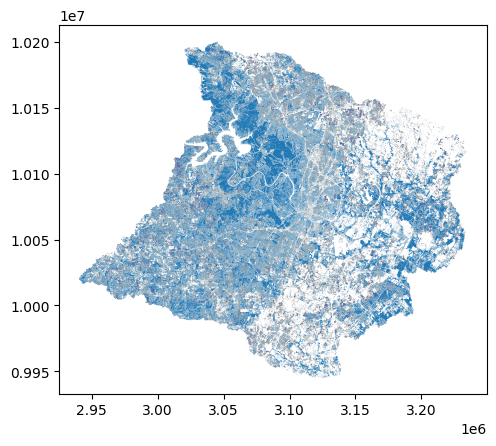

In [27]:
import matplotlib.pyplot as plt
tree_canopy.plot()
plt.show()

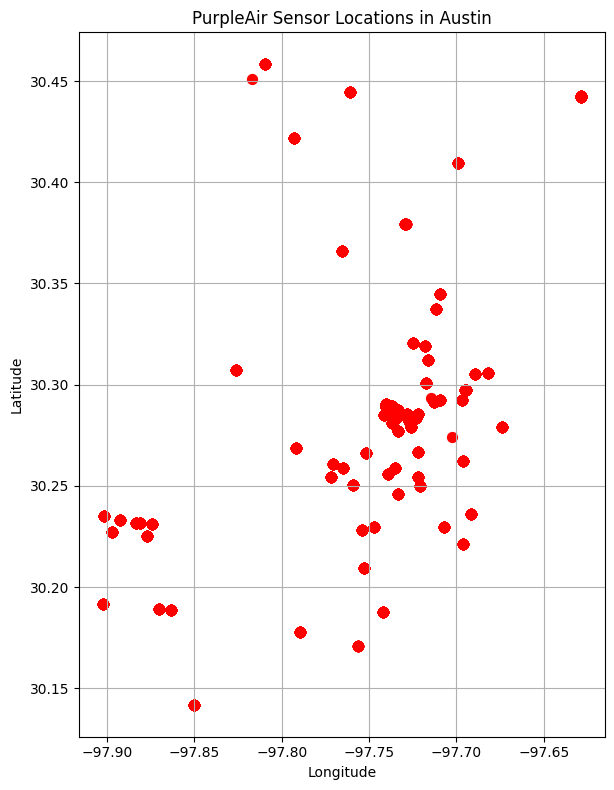

In [20]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Create geometry column from latitude and longitude
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

# Get Austin boundary for context
# austin = gpd.read_file('Boundaries__City_of_Austin_Neighborhoods_20241112.csv')

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot Austin boundary
# austin.plot(ax=ax, alpha=0.5, color='lightgray')

# Plot sensors
gdf.plot(ax=ax, color='red', markersize=50)

# Customize the plot
plt.title('PurpleAir Sensor Locations in Austin')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add basemap context
ax.grid(True)
plt.tight_layout()
plt.show()


In [7]:
import geopandas as gpd
import fiona

# Replace 'path_to_gdb_folder' with the actual path to the .gdb folder
gdb_path = './Tree_Canopy_2022/Tree_Canopy_2022.gdb'

# List available layers
layers = fiona.listlayers(gdb_path)
print("Available layers:", layers)

Available layers: ['tree_canopy_2022', 'city_of_austin_jurisdiction_2023']


In [4]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import os
import time

# Record the start time
start_time = time.time()

# Define file paths
gdb_path = './Tree_Canopy_2022/Tree_Canopy_2022.gdb'
simplified_canopy_path = './Tree_Canopy_2022/simplified_tree_canopy.gpkg'

### Step 1: Load and simplify the canopy data ###
print("Starting Step 1: Load and simplify the canopy data")
step1_start = time.time()

if os.path.exists(simplified_canopy_path):
    # Load the pre-simplified canopy data if it exists
    tree_canopy = gpd.read_file(simplified_canopy_path)
    print("Loaded pre-simplified canopy data.")
else:
    # Load the original canopy data
    tree_canopy = gpd.read_file(gdb_path, layer='tree_canopy_2022')
    print("Loaded original canopy data.")

    # Repair geometry by applying a small buffer of 0
    print("Repairing geometry...")
    tree_canopy['geometry'] = tree_canopy['geometry'].buffer(0)
    
    # Optional: Remove small polygons
    print("Removing small polygons...")
    tree_canopy = tree_canopy[tree_canopy['Shape_Area'] > 10]

    # Simplify the canopy polygons with a higher tolerance value
    print("Simplifying canopy polygons...")
    tree_canopy['geometry'] = tree_canopy['geometry'].simplify(tolerance=5)

    # Dissolve all polygons into a single polygon
    print("Dissolving canopy polygons into a single geometry...")
    tree_canopy['dissolve_field'] = 1
    tree_canopy = tree_canopy.dissolve(by='dissolve_field')

    # Save the simplified canopy to a new file
    print("Saving simplified canopy data...")
    tree_canopy.to_file(simplified_canopy_path, layer="simplified_canopy", driver="GPKG")
    print("Simplified canopy data saved.")

step1_end = time.time()
print(f"Step 1 completed in {step1_end - step1_start:.2f} seconds.\n")

### Step 2: Load and prepare sensor data ###
print("Starting Step 2: Load and prepare sensor data")
step2_start = time.time()

# Load sensor data
sensor_data = pd.read_csv('./purpleair/austin_sensors.csv')

# Convert lat/lon to geometry points
print("Converting sensor coordinates to geometry...")
sensor_data['geometry'] = sensor_data.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
sensor_data = gpd.GeoDataFrame(sensor_data, geometry='geometry')

# Set CRS for sensor data and reproject
print("Setting CRS and reprojecting sensor data...")
sensor_data = sensor_data.set_crs("EPSG:4326")
sensor_data = sensor_data.to_crs(tree_canopy.crs)

step2_end = time.time()
print(f"Step 2 completed in {step2_end - step2_start:.2f} seconds.\n")

### Step 3: Create buffers around sensors ###
print("Starting Step 3: Create buffers around sensors")
step3_start = time.time()

# Set buffer distance in meters for 1.5 miles
k_miles = 1.5
buffer_distance = k_miles * 1609.34  # Convert miles to meters

# Buffer each sensor location
print(f"Creating buffers of {k_miles} miles around each sensor...")
sensor_data['buffer'] = sensor_data.geometry.buffer(buffer_distance)

step3_end = time.time()
print(f"Step 3 completed in {step3_end - step3_start:.2f} seconds.\n")

### Step 4: Calculate canopy coverage ###
print("Starting Step 4: Calculate canopy coverage")
step4_start = time.time()

# Initialize a list to store results
coverage_results = []

# Iterate over each sensor
for idx, sensor in sensor_data.iterrows():
    sensor_start = time.time()
    print(f"Processing sensor {sensor['sensor_index']}...")

    # Intersect the buffer with the canopy polygons
    canopy_within_buffer = gpd.overlay(
        tree_canopy,
        gpd.GeoDataFrame(geometry=[sensor['buffer']], crs=tree_canopy.crs),
        how='intersection'
    )
    
    # Calculate total canopy area within the buffer
    total_canopy_area = canopy_within_buffer.area.sum()
    
    # Add result to list
    coverage_results.append({
        'sensor_index': sensor['sensor_index'],
        'canopy_coverage_area': total_canopy_area,
        'buffer_area': sensor['buffer'].area,
        'canopy_coverage_percentage': (total_canopy_area / sensor['buffer'].area) * 100
    })

    sensor_end = time.time()
    print(f"Sensor {sensor['sensor_index']} processed in {sensor_end - sensor_start:.2f} seconds.")

step4_end = time.time()
print(f"Step 4 completed in {step4_end - step4_start:.2f} seconds.\n")

### Step 5: Compile results ###
print("Starting Step 5: Compile results")
step5_start = time.time()

# Convert results to a DataFrame or GeoDataFrame for further analysis
coverage_df = pd.DataFrame(coverage_results)
print(coverage_df.head())

step5_end = time.time()
print(f"Step 5 completed in {step5_end - step5_start:.2f} seconds.\n")

# Total execution time
end_time = time.time()
print(f"Total script execution time: {end_time - start_time:.2f} seconds.")

Starting Step 1: Load and simplify the canopy data
Loaded pre-simplified canopy data.
Step 1 completed in 11.44 seconds.

Starting Step 2: Load and prepare sensor data
Converting sensor coordinates to geometry...
Setting CRS and reprojecting sensor data...
Step 2 completed in 0.02 seconds.

Starting Step 3: Create buffers around sensors
Creating buffers of 1.5 miles around each sensor...
Step 3 completed in 0.00 seconds.

Starting Step 4: Calculate canopy coverage
Processing sensor 2796...
Sensor 2796 processed in 15.39 seconds.
Processing sensor 2806...
Sensor 2806 processed in 15.22 seconds.
Processing sensor 2862...
Sensor 2862 processed in 14.85 seconds.
Processing sensor 4041...
Sensor 4041 processed in 14.98 seconds.
Processing sensor 14983...
Sensor 14983 processed in 14.70 seconds.
Processing sensor 15101...
Sensor 15101 processed in 21.37 seconds.
Processing sensor 15103...
Sensor 15103 processed in 14.77 seconds.
Processing sensor 15105...
Sensor 15105 processed in 18.20 seco

In [10]:
coverage_df.to_csv('tree_canopy_data.csv')

In [3]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import os
import time

# Record the start time
start_time = time.time()

# Define file paths
gdb_path = './Tree_Canopy_2022/Tree_Canopy_2022.gdb'
original_canopy_path = './Tree_Canopy_2022/original_tree_canopy.gpkg'

### Step 1: Load the original canopy data without simplifications ###
print("Starting Step 1: Load the original canopy data without simplifications")
step1_start = time.time()

# Load the original canopy data
if os.path.exists(original_canopy_path):
    tree_canopy = gpd.read_file(original_canopy_path)
    print("Loaded original canopy data from saved file.")
else:
    tree_canopy = gpd.read_file(gdb_path, layer='tree_canopy_2022')
    print("Loaded original canopy data from GDB.")
    # Save the original canopy data for future use
    tree_canopy.to_file(original_canopy_path, layer="original_canopy", driver="GPKG")

step1_end = time.time()
print(f"Step 1 completed in {step1_end - step1_start:.2f} seconds.\n")

### Step 2: Load and prepare sensor data ###
print("Starting Step 2: Load and prepare sensor data")
step2_start = time.time()

# Load sensor data
sensor_data = pd.read_csv('./purpleair/austin_sensors.csv')

# Convert lat/lon to geometry points
print("Converting sensor coordinates to geometry...")
sensor_data['geometry'] = sensor_data.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
sensor_data = gpd.GeoDataFrame(sensor_data, geometry='geometry')

# Set CRS for sensor data and reproject
print("Setting CRS and reprojecting sensor data...")
sensor_data = sensor_data.set_crs("EPSG:4326")
sensor_data = sensor_data.to_crs(tree_canopy.crs)

step2_end = time.time()
print(f"Step 2 completed in {step2_end - step2_start:.2f} seconds.\n")

### Step 3: Create buffers around sensors ###
print("Starting Step 3: Create buffers around sensors")
step3_start = time.time()

# Set buffer distance in meters for 1.5 miles
k_miles = 1.5
buffer_distance = k_miles * 1609.34  # Convert miles to meters

# Buffer each sensor location
print(f"Creating buffers of {k_miles} miles around each sensor...")
sensor_data['buffer'] = sensor_data.geometry.buffer(buffer_distance)

step3_end = time.time()
print(f"Step 3 completed in {step3_end - step3_start:.2f} seconds.\n")

### Step 4: Calculate canopy coverage ###
print("Starting Step 4: Calculate canopy coverage")
step4_start = time.time()

# Initialize a list to store results
coverage_results = []

# Iterate over each sensor
for idx, sensor in sensor_data.iterrows():
    sensor_start = time.time()
    print(f"Processing sensor {sensor['sensor_index']}...")

    # Intersect the buffer with the canopy polygons
    canopy_within_buffer = gpd.overlay(
        tree_canopy,
        gpd.GeoDataFrame(geometry=[sensor['buffer']], crs=tree_canopy.crs),
        how='intersection'
    )
    
    # Calculate total canopy area within the buffer
    total_canopy_area = canopy_within_buffer.area.sum()
    
    # Add result to list
    coverage_results.append({
        'sensor_index': sensor['sensor_index'],
        'canopy_coverage_area': total_canopy_area,
        'buffer_area': sensor['buffer'].area,
        'canopy_coverage_percentage': (total_canopy_area / sensor['buffer'].area) * 100
    })

    sensor_end = time.time()
    print(f"Sensor {sensor['sensor_index']} processed in {sensor_end - sensor_start:.2f} seconds.")

step4_end = time.time()
print(f"Step 4 completed in {step4_end - step4_start:.2f} seconds.\n")

### Step 5: Compile results ###
print("Starting Step 5: Compile results")
step5_start = time.time()

# Convert results to a DataFrame or GeoDataFrame for further analysis
coverage_df = pd.DataFrame(coverage_results)
print(coverage_df.head())

step5_end = time.time()
print(f"Step 5 completed in {step5_end - step5_start:.2f} seconds.\n")

# Total execution time
end_time = time.time()
print(f"Total script execution time: {end_time - start_time:.2f} seconds.")

Starting Step 1: Load the original canopy data without simplifications
Loaded original canopy data from saved file.
Step 1 completed in 12.75 seconds.

Starting Step 2: Load and prepare sensor data
Converting sensor coordinates to geometry...
Setting CRS and reprojecting sensor data...
Step 2 completed in 0.02 seconds.

Starting Step 3: Create buffers around sensors
Creating buffers of 1.5 miles around each sensor...
Step 3 completed in 0.00 seconds.

Starting Step 4: Calculate canopy coverage
Processing sensor 2796...
Sensor 2796 processed in 76.46 seconds.
Processing sensor 2806...
Sensor 2806 processed in 76.31 seconds.
Processing sensor 2862...
Sensor 2862 processed in 75.77 seconds.
Processing sensor 4041...
Sensor 4041 processed in 77.31 seconds.
Processing sensor 14983...
Sensor 14983 processed in 76.76 seconds.
Processing sensor 15101...
Sensor 15101 processed in 75.38 seconds.
Processing sensor 15103...
Sensor 15103 processed in 75.47 seconds.
Processing sensor 15105...
Sensor

In [4]:
coverage_df.to_csv('tree_canopy_data_full.csv')
print(coverage_df.shape)
coverage_df.head()

(191, 4)


,sensor_index,canopy_coverage_area,buffer_area,canopy_coverage_percentage
0,2796,1.311085e+07,1.827806e+07,71.729977
1,2806,6.017534e+06,1.827806e+07,32.922166
2,2862,1.217252e+07,1.827806e+07,66.596351
3,4041,9.475800e+06,1.827806e+07,51.842479
4,14983,7.228685e+06,1.827806e+07,39.548425


In [ ]:
import geopandas as gpd
from shapely.geometry import Point

# Path to the canopy data
gdb_path = './Tree_Canopy_2022/Tree_Canopy_2022.gdb'
tree_canopy = gpd.read_file(gdb_path, layer='tree_canopy_2022')

# Dissolve all canopy polygons into a single polygon
tree_canopy['dissolve_field'] = 1  # Temporary field to dissolve on
dissolved_canopy = tree_canopy.dissolve(by='dissolve_field')

# Save the dissolved canopy for future use
dissolved_canopy.to_file("dissolved_tree_canopy.gpkg", layer="simplified_canopy", driver="GPKG")

# Load and set up the sensor data
sensor_data = pd.read_csv('./purpleair/austin_sensors.csv')
sensor_data['geometry'] = sensor_data.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)

# Select specific sensors by their index values
sensor_data = sensor_data[sensor_data['sensor_index'].isin([30085, 49081, 15233])]
sensor_data = gpd.GeoDataFrame(sensor_data, geometry='geometry')

# Set CRS for sensor data and reproject to match the canopy data
sensor_data = sensor_data.set_crs("EPSG:4326")
sensor_data = sensor_data.to_crs(dissolved_canopy.crs)

# Define buffer distance (1.5 miles converted to meters)
k_miles = 1.5
buffer_distance = k_miles * 1609.34

# Create buffers around each sensor location
sensor_data['buffer'] = sensor_data.geometry.buffer(buffer_distance)

# Initialize a list to store results
coverage_results = []

# Iterate over each sensor for canopy coverage calculation
for index, sensor in sensor_data.iterrows():
    # Intersect the buffer with the dissolved canopy
    canopy_within_buffer = gpd.overlay(dissolved_canopy, gpd.GeoDataFrame(geometry=[sensor['buffer']], crs=dissolved_canopy.crs), how='intersection')
    
    # Calculate the total canopy area within the buffer
    total_canopy_area = canopy_within_buffer['geometry'].area.sum()
    
    # Append results for each sensor
    coverage_results.append({
        'sensor_index': sensor['sensor_index'],
        'canopy_coverage_area': total_canopy_area,
        'buffer_area': sensor['buffer'].area,
        'canopy_coverage_percentage': (total_canopy_area / sensor['buffer'].area) * 100
    })

    # Optional: Progress update
    if index % 9 == 0:
        print(f'{(index + 1) / sensor_data.shape[0] * 100}% Finished')

# Convert results to a DataFrame or GeoDataFrame for further analysis
coverage_df = gpd.GeoDataFrame(coverage_results)
print(coverage_df.shape)
print(coverage_df.head())

In [5]:
coverage_df['canopy_coverage_percentage'].mean()

np.float64(29.66619156243333)

In [20]:
import pandas as pd

canopies = pd.read_csv('tree_canopy_data_full.csv')
full_data = pd.read_csv('full_data.csv')
df = pd.merge(full_data, canopies, how='inner', on='sensor_index')
df.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y', 'canopy_coverage_area', 'buffer_area'], inplace=True)
df.head()

,time_stamp,humidity,temperature,pressure,pm2.5_alt,pm2.5_atm,sensor_index,latitude,longitude,altitude,Oak,Elm,Pecan,Crape Myrtle,Ashe Juniper,other,total_diameter,canopy_coverage_percentage
0,2024-10-24T18:00:00Z,35.447,92.044,981.676,2.5,3.2195,2862,30.366156,-97.76529,899.0,1192,426,2,49,10,130,22595.5,66.596351
1,2024-10-24T06:00:00Z,61.950,78.405,984.603,3.6,5.6470,2862,30.366156,-97.76529,899.0,1192,426,2,49,10,130,22595.5,66.596351
2,2024-10-24T00:00:00Z,45.133,83.672,985.485,3.1,4.7600,2862,30.366156,-97.76529,899.0,1192,426,2,49,10,130,22595.5,66.596351
3,2024-10-23T00:00:00Z,48.216,83.123,986.001,2.6,3.9515,2862,30.366156,-97.76529,899.0,1192,426,2,49,10,130,22595.5,66.596351
4,2024-10-23T18:00:00Z,33.578,93.095,985.318,2.5,3.2565,2862,30.366156,-97.76529,899.0,1192,426,2,49,10,130,22595.5,66.596351


In [21]:
df.to_csv('full_data_with_canopy.csv', index=False)